# Introduzione al Machine Learning 2023-2024
## Bernardini Jacopo, Ciocca Giorgio, Marini Tommaso
## Exam Project, First Part: Data Exploration, Clustering  and Classification

### 1) Data Exploration

Libraries import

In [156]:
import numpy as np
import pandas as pd
import pylab as plt

File reading and substitution of 'notknown' values with NaNs 

In [157]:
filename = r'C:\Users\Utente\OneDrive\Desktop\MachineLearning\pums.csv'
data = pd.read_csv(filename, na_values='notknown')
data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,True
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,False
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,True
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,True


In [158]:
data[data.isnull().sum(axis=1)>1]

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
89,48.0,19.0,3.0,16.0,2.0,0.0,1.0,3.0,4.0,1.0,NaN,2.0,NaN,2.0,2.0,False
128,64.0,12.0,2.0,NaN,1.0,0.0,1.0,1.0,4.0,1.0,1.0,1.0,NaN,2.0,1.0,False
135,45.0,12.0,5.0,NaN,2.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,2.0,1.0,False
212,25.0,19.0,5.0,16.0,2.0,0.0,1.0,3.0,4.0,1.0,NaN,NaN,2.0,2.0,1.0,False
230,92.0,NaN,1.0,16.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746268,59.0,19.0,1.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,NaN,2.0,NaN,2.0,2.0,True
746277,12.0,9.0,5.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,NaN,NaN,2.0,2.0,2.0,False
746298,54.0,NaN,1.0,1.0,2.0,0.0,1.0,1.0,4.0,4.0,NaN,2.0,2.0,2.0,1.0,True
746323,63.0,16.0,1.0,1.0,2.0,0.0,NaN,1.0,4.0,1.0,NaN,2.0,2.0,2.0,2.0,True


Replace Boolean target variable with O and 1


In [159]:
data=data.replace({False:1, True:0})
#data = data.infer_objects(copy=False)
data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,0
1,19.0,16.0,5.0,17.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,2.0,2.0,1
2,24.0,12.0,5.0,16.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,1
3,20.0,16.0,5.0,17.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,NaN,2.0,2.0,0
4,31.0,17.0,5.0,17.0,2.0,1.0,0.0,3.0,4.0,4.0,0.0,2.0,2.0,2.0,0.0,0


First data check

In [160]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
AGEP        746336 non-null float64
SCHL        709133 non-null float64
MAR         746336 non-null float64
RELP        709213 non-null float64
DIS         746336 non-null float64
ESP         746336 non-null float64
CIT         709287 non-null float64
MIG         746336 non-null float64
MIL         746336 non-null float64
ANC         746336 non-null float64
NATIVITY    708813 non-null float64
DEAR        708974 non-null float64
DEYE        709267 non-null float64
DREM        746336 non-null float64
SEX         746336 non-null float64
ESR         746336 non-null int64
dtypes: float64(15), int64(1)
memory usage: 91.1 MB


AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR        37362
DEYE        37069
DREM            0
SEX             0
ESR             0
dtype: int64

In [161]:
data.corr()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
AGEP,1.000000,0.519828,-0.618938,-0.138617,-0.319927,-0.307659,0.140825,-0.136756,0.573312,-0.074983,0.159864,-0.240258,-0.127745,0.067845,0.045588,-0.108239
SCHL,0.519828,1.000000,-0.425191,-0.087216,-0.032215,-0.330339,0.012075,-0.003877,0.670909,-0.041250,0.022342,-0.035718,-0.001786,0.263862,0.020407,-0.430964
MAR,-0.618938,-0.425191,1.000000,0.352516,0.064485,0.237918,-0.200718,0.116903,-0.445436,0.068087,-0.212953,0.087642,0.024780,-0.147347,-0.026625,0.241680
RELP,-0.138617,-0.087216,0.352516,1.000000,-0.102497,0.033321,-0.015706,0.216493,-0.011845,0.034541,-0.024295,-0.013228,-0.048438,-0.152691,-0.056449,0.127330
DIS,-0.319927,-0.032215,0.064485,-0.102497,1.000000,0.051191,0.036782,0.008677,-0.089186,-0.004914,0.031085,0.512855,0.405873,0.502685,-0.004698,-0.209605
ESP,-0.307659,-0.330339,0.237918,0.033321,0.051191,1.000000,-0.086380,0.025520,-0.385567,0.008812,-0.090483,0.037732,0.020746,-0.086719,-0.008824,0.201083
CIT,0.140825,0.012075,-0.200718,-0.015706,0.036782,-0.086380,1.000000,-0.018380,0.214332,-0.186484,0.974995,0.024546,-0.000775,0.078797,0.012378,-0.109305
MIG,-0.136756,-0.003877,0.116903,0.216493,0.008677,0.025520,-0.018380,1.000000,-0.004596,0.037641,-0.025797,0.021254,-0.000214,-0.044172,-0.012748,0.001839
MIL,0.573312,0.670909,-0.445436,-0.011845,-0.089186,-0.385567,0.214332,-0.004596,1.000000,-0.073998,0.220854,-0.025494,-0.043128,0.162740,0.104421,-0.449375
ANC,-0.074983,-0.041250,0.068087,0.034541,-0.004914,0.008812,-0.186484,0.037641,-0.073998,1.000000,-0.193216,-0.000484,0.003356,-0.037335,0.005504,0.019626


In [162]:
data.describe()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
count,746336.000000,709133.000000,746336.000000,709213.000000,746336.000000,746336.000000,709287.000000,746336.000000,746336.000000,746336.000000,708813.000000,708974.000000,709267.000000,746336.000000,746336.000000,746336.000000
mean,40.377495,15.419198,2.575731,2.857239,1.732080,1.333259,0.899883,0.398054,3.276376,1.169318,0.385269,1.921842,1.950261,1.844480,1.015813,0.546965
std,23.375880,6.398847,2.323348,4.242341,0.681219,1.461575,1.788278,1.001953,1.239827,1.529518,0.788738,0.387566,0.311454,0.484536,0.999876,0.497790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,13.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000
50%,40.000000,17.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,59.000000,20.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,94.000000,24.000000,5.000000,17.000000,2.000000,8.000000,5.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [163]:
#data['SCHL'].hist()

In [164]:
#data['MAR'].hist()

In [165]:
#data['RELP'].hist(bins=18)
#data[data['RELP']==7].mean()

In [166]:
#data['DIS'].hist()

In [167]:
#data['ESP'].hist()

In [168]:
#data['CIT'].hist()

In [169]:
#data['MIG'].hist()

In [170]:
#data['MIL'].hist()

In [171]:
#data['ANC'].hist()

In [172]:
#data['NATIVITY'].hist()

In [173]:
 #data['DEAR'].hist()

In [174]:
#data['DEYE'].hist()

In [175]:
#data['DREM'].hist()

In [176]:
#data['SEX'].hist()

In [177]:
#data['ESR'].hist()

In [178]:
#data.corr()

substituted NaN values of DEYE and DEAR with mode

In [179]:
data['DEYE']=data['DEYE'].fillna(2)
data['DEAR']=data['DEAR'].fillna(2)
data.isna().sum()

AGEP            0
SCHL        37203
MAR             0
RELP        37123
DIS             0
ESP             0
CIT         37049
MIG             0
MIL             0
ANC             0
NATIVITY    37523
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

dropping every row in which both CIT and NATIVITY are NaNs

In [180]:
cond = data['CIT'].isna() & data['NATIVITY'].isna()
data = data.loc[~cond]

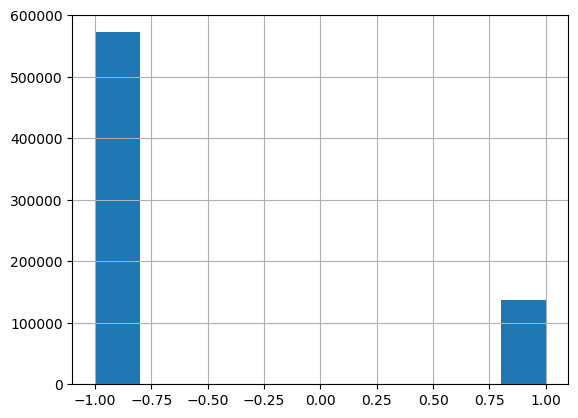

In [181]:
data['NATIVITY'] = data['NATIVITY'] - 1
data['NATIVITY'].hist()

In [182]:
#pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

reconstruction of NAT from CIT

In [183]:
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']<4), 'NATIVITY'] = 0
data.loc[(data['NATIVITY'].isnull()) & (data['CIT']>3), 'NATIVITY'] = 1

checking whether we did everything correctly

In [184]:
#pd.plotting.scatter_matrix(data[['CIT','NATIVITY']])

Fill CIT from correlation with NATIVITY 

In [185]:
data.loc[(data['CIT'].isnull()) & (data['NATIVITY']==0), 'CIT'] = 1
data.loc[(data['CIT'].isnull()) & (data['NATIVITY']==1), 'CIT'] = np.random.randint(4,5)
data.isna().sum()

AGEP            0
SCHL        37103
MAR             0
RELP        37036
DIS             0
ESP             0
CIT         28505
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

In [186]:
data=data.drop('RELP', axis=1)
data.isna().sum()

AGEP            0
SCHL        37103
MAR             0
DIS             0
ESP             0
CIT         28505
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

Fill missing school by correlation with AGE

In [187]:
#pd.plotting.scatter_matrix(data[['SCHL','AGEP']])

In [188]:
data['SCHL_mode']=data.groupby('AGEP')['SCHL'].transform(lambda x: x.mode().iloc[0])
data['SCHL']=data['SCHL'].fillna(data['SCHL_mode'])
data.drop('SCHL_mode', axis=1, inplace=True)
data.isna().sum()

AGEP            0
SCHL            0
MAR             0
DIS             0
ESP             0
CIT         28505
MIG             0
MIL             0
ANC             0
NATIVITY        0
DEAR            0
DEYE            0
DREM            0
SEX             0
ESR             0
dtype: int64

Checking everything is okay

In [189]:
#pd.plotting.scatter_matrix(data[['SCHL','AGEP']])

### 2) CLUSTERING

In [190]:
data_target = data['ESR']
data.drop('ESR', axis=1, inplace=True)

Normalization

In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(data.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [192]:
data_scaled=scaler.transform(data.values)

#### K-means

In [193]:
from sklearn.cluster import KMeans

In [196]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=300)
kmeans.fit(data_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([151279, 593195], dtype=int64))

In [ ]:
data_target.sum()

337267

Visualization

Parallel coordinates

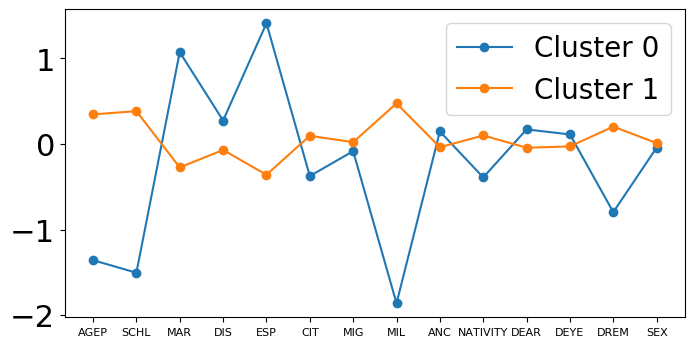

In [ ]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(data.columns)), data.columns, fontsize=8)
plt.legend(fontsize=20)
plt.show()


Labels clustering

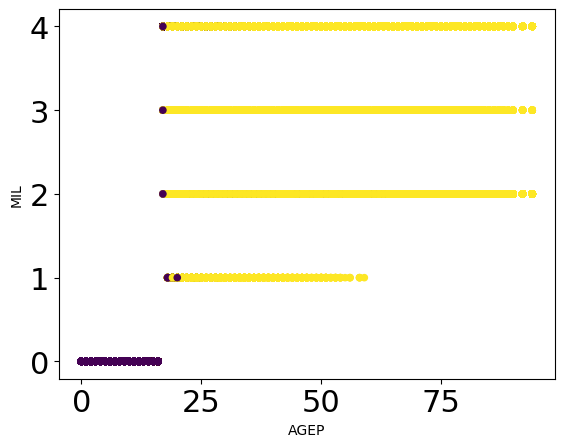

In [ ]:
plt.scatter(data['AGEP'], data['MIL'], 
           c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('AGEP')
plt.ylabel('MIL')
plt.show()

Labels target

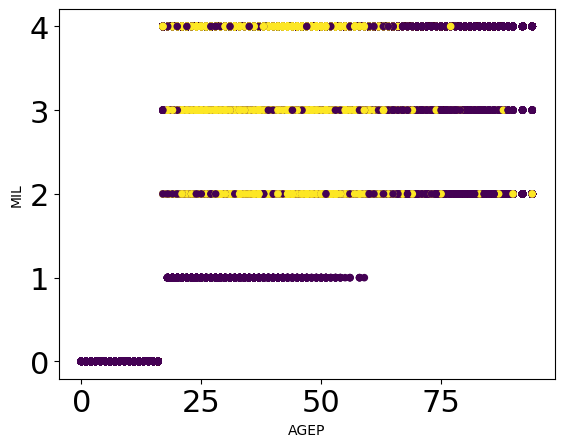

In [ ]:
plt.scatter(data['AGEP'], data['MIL'], 
           c=data_target, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('AGEP')
plt.ylabel('MIL')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == "":


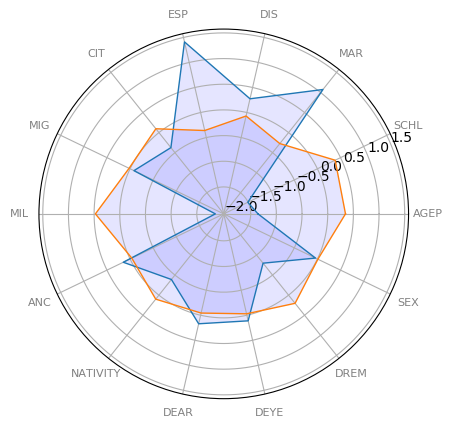

In [ ]:
from math import pi
 
# number of variable
N = len(data.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], data.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
